In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder

# 1. Read Data and Preprocess

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data.shape

(2240, 29)

There are 24 missing values in the "Income" column, and given the limited amount of data entries, I propose replacing these null values with the median instead of deleting the corresponding rows. This approach will prevent us from losing any valuable information.

In [8]:
# Replace null values in "Income" column with median
median_income = data['Income'].median()
data['Income'].fillna(median_income, inplace=True)
# Check if there is any null value left
data['Income'].isnull().sum()

0

We also need to encode categorical columns.

In [9]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Marital status and education both have multiple categories that are synonymous. For instance, the terms "Divorced", "Widow", "Alone", "Absurd", and "Yolo" can all be classified as "Single", while "Together" and "Married" can be grouped as "Relationship". 

In [10]:
# Replace "Divorced", "Widow", "Alone", "Absurd", "Yolo" with "Single"
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')
# Replace "Together" and "Married" with "Relationship"
data['Marital_Status'] = data['Marital_Status'].replace(['Together','Married'], 'Relationship')


In [11]:
data['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

In [12]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Similarly, the designations "2nd Cycle", "Master", and "PhD" can be classified as "Postgraduate", while "Basic" can be categorized as "Undergraduate".

In [13]:
# Replace "Basic" with "Undergraduate"
data['Education'] = data['Education'].replace(['Basic'], 'Undergraduate')
# Replace "2nd Cycle", "Master" and "PhD" with "Postgraduate"
data['Education'] = data['Education'].replace(['2n Cycle', 'Master', 'Graduation','PhD'], 'Postgraduate')

In [14]:
data['Education'].unique()

array(['Postgraduate', 'Undergraduate'], dtype=object)

In [15]:
# Convert categorical variables to numerical variables
label_encoder = LabelEncoder()

# Education
label_encoder.fit(data['Education'])
print(list(label_encoder.classes_))
data['Education'] = label_encoder.transform(data['Education'])
print("Education labels: \n", "\t0: %s\n \t1: %s\n" % tuple(label_encoder.inverse_transform([0, 1])))

# Marital_Status
label_encoder.fit(data['Marital_Status'])
print(list(label_encoder.classes_))
data['Marital_Status'] = label_encoder.transform(data['Marital_Status'])
print("Maritial status labels: \n", "\t0: %s\n \t1: %s" % tuple(label_encoder.inverse_transform([0, 1])))

['Postgraduate', 'Undergraduate']
Education labels: 
 	0: Postgraduate
 	1: Undergraduate

['Relationship', 'Single']
Maritial status labels: 
 	0: Relationship
 	1: Single


In [16]:
# Convert "Dt_Customer"" to datetime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
# Rename "Dt_Customer" as "Date"
data.rename(columns={"Dt_Customer": "Date"}, inplace=True)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   int64         
 3   Marital_Status       2240 non-null   int64         
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Date                 2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [18]:
# We don't need Z_CostContact and Z_Revenue columns
data.drop(["Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

# 2. Data Analysis

In [19]:
# Some default configs
matplotlib.rcParams['figure.figsize'] = (10, 10)
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='Age', ylabel='Count'>

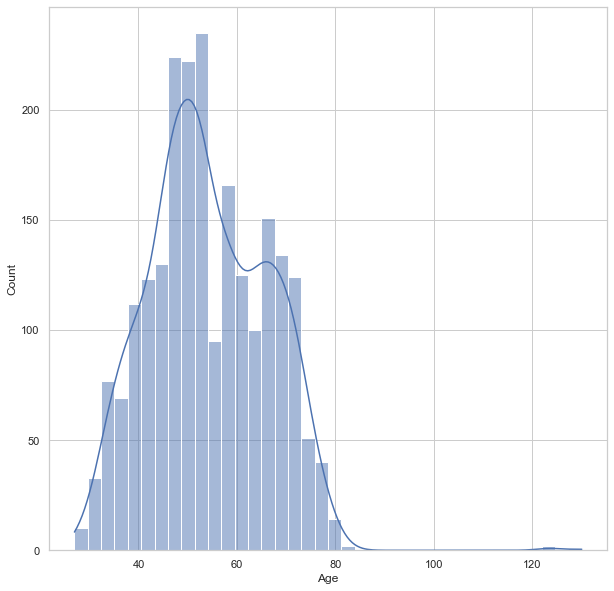

In [22]:
# Let's start our data analysis by looking at the distribution of Age

# Calculate age from birth year
current_year = datetime.datetime.now().year
data["Age"] = current_year - data["Year_Birth"]

# Plot the distribution of Age
sns.histplot(data["Age"], kde=True)

<AxesSubplot:xlabel='Income', ylabel='Count'>

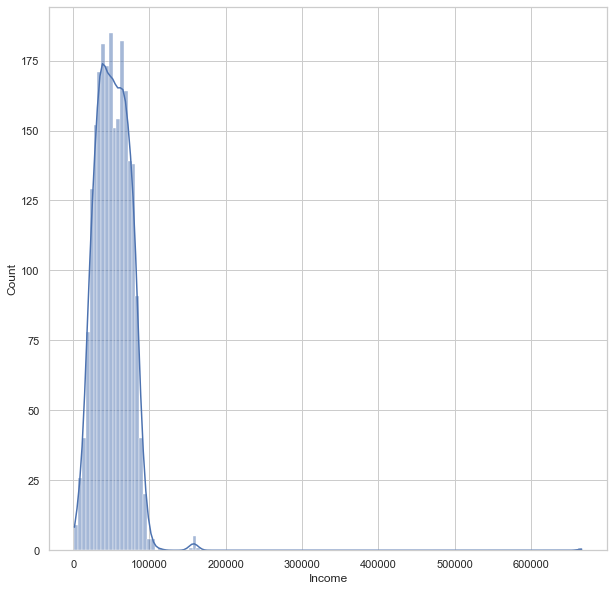

In [21]:
# Let's look at the distribution of Income
sns.histplot(data["Income"], kde=True)